<img src="https://drive.google.com/uc?export=view&id=1Krpv420Trw6HQbArLSzrbYcpBz-9wgxw" width=300/>

# Data Engineering
## Assignment 1: Webscraping wikipedia's Billboard pages

**Alok K Pandey**<br>

## Background

    The Billboard Hot 100 is a chart that ranks the best-performing singles of the United States. Its data, published by Billboard magazine and compiled by Nielsen SoundScan, is based collectively on each single's weekly physical and digital sales, as well as airplay and streaming. At the end of a year, Billboard will publish an annual list of the 100 most successful songs throughout that year on the Hot 100 chart based on the information.
    
>> Check out Hot 100 single of 2022: https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2022

## Instructions <a class="anchor" id="instructions"></a>

<hr style="height:2pt">


# Task 1: Constructing a year-song dataframe

**Question 1:** Scrape and Parse Wikipedia for Billboard's Top 100 songs starting from 1992 to 2022.

**1.1** Scrape Wikipedia's Billboard pages from 1992 to 2022.

<details>

- Use python's `requests` module to obtain (GET) the web pages at http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1992, http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1993 till http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2022.

- Store the text from your `requests` in a dictionary called `yearstext`. 
This dictionary should have as its keys the years (as integers from 1992 to 2022), and as values corresponding to these keys the text of the page being fetched.

*Hint:* Put your requests.get() in a `for` loop and use the `time.sleep` function to wait one second between requests, you do not want Wikipedia to think you are a marauding bot attempting to mount a denial-of-service attack.

</details>


**1.2** Parse the HTML retrieved to extract ranking, song and artist information. 

  **Note:** Here are some other issues that you will need to take care of while parsing:

<details>
    
    i. The example shown above has several artists for a single song. In this case, the `band_singer` and `url` would be a list of items.

    ii. Some singles might even have multiple songs because of the way the industry works:
    ```
    {'ranking': 98,
    'song': ["You're Makin' Me High", 'Let It Flow (song)'],
    'songurl': ['/wiki/You%27re_Makin%27_Me_High', '/wiki/Let_It_Flow_(song)'],
    'titletext': '"You\'re Makin\' Me High" / "Let It Flow"',
    'band_singer': ['Toni Braxton'],
    'url': ['/wiki/Toni_Braxton']}
    ```
    (See 1997 for an example)

    iii. Some songs don't have a URL. In this case, assume there is one song in the single, set `songurl` to [`None`] and the song name to the contents of the table cell with the quotes stripped:
    ```
    {'ranking': 45,
      'song': ['Say It'],
      'songurl': [None],
      'titletext': '"Say It"',
      'band_singer': ['Voices of Theory'],
      'url': ['/wiki/Voices_of_Theory']}
    ```
    (See 1998 for an example)

</details>
<br>
<hr style="height:2pt">

In [1]:
# libraries to get you started
import numpy as np
import pandas as pd
import json
import re
import requests
import time
from bs4 import BeautifulSoup

* Hint: Save the obtained dictionary as a json file so you do not need to run it over and over again.

In [2]:
# Start your code here

# Dictionary to store the text of each year's Wikipedia page
yearstext = {}

# Scrape Wikipedia pages from 1992 to 2022
for year in range(1992, 2023):
    url = f"http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_{year}"
    response = requests.get(url)
    yearstext[year] = response.text
    time.sleep(1)  # Wait for 1 second between requests

# Parse the HTML and extract ranking, song, and artist information
year_song_data = []
for year, text in yearstext.items():
    soup = BeautifulSoup(text, 'html.parser')
    table = soup.find('table', class_='wikitable')
    rows = table.find_all('tr')[1:]  # Skip the header row
    for row in rows:
        try:
            columns = row.find_all('td')
            ranking = int(columns[0].text.strip())
            title_text = columns[1].text.strip()
            song_url_elements = columns[1].find_all('a')
            if len(song_url_elements) > 0:
                song_urls = [a['href'] for a in song_url_elements]
                songs = [a.text for a in song_url_elements]
            else:
                song_urls = [None]
                songs = [title_text.strip('"')]
            artist_url_elements = columns[2].find_all('a')
            if len(artist_url_elements) > 0:
                artist_urls = [a['href'] for a in artist_url_elements]
                artists = [a.text for a in artist_url_elements]
            else:
                artist_urls = [None]
                artists = [columns[2].text.strip()]
            year_song_data.append({
                'year': year,  # Include the year as a key value
                'ranking': ranking,
                'song': songs,
                'songurl': song_urls,
                'titletext': title_text,
                'band_singer': artists,
                'url': artist_urls
            })
        except IndexError:
            continue

# Save the data as a JSON file
with open('year_song_data.json', 'w') as file:
    json.dump(year_song_data, file)

print("Data saved as 'year_song_data.json'.")


Data saved as 'year_song_data.json'.


<hr style="height:2pt">

**Question 2:** Construct a DataFrame from parsed data

**2.1** Construct a dataframe from the dictionary `yearinfo`.

<details>
    
- Construct a dataframe from the dictionary created in the previous section `yearinfo`. Name this dataframe `billboardtop`.<br><br>
  Keep in mind, in the data structure we have so far, a given key can have a list of values with multiple entries. Also, our data is grouped by year. So we need a way to flatten this data into a format that will create a useful DataFrame. 
  Your final dataframe `billboardtop` should look something like this:

  <img src="https://drive.google.com/uc?export=view&id=1adDiuSmHXR7B7YO2ZNT_OJ9QejUyuJAC" width=1500/>

- Ensure that all lists in your dictionary are in different rows. <br>
  For example, a single containing two artists should be two different rows:
  <img src="https://drive.google.com/uc?export=view&id=1hxGXmP20vJ5i1N7WDg_pZBYly7gX2Gz0" width=1500/>

  A single containing two titles (1997, Rank 98) should be two different rows:
  <img src="https://drive.google.com/uc?export=view&id=1nRrDQOixcH4HfahfA9YF7R7brm_OyD7d" width=1500/>

</details>

**2.2** Check your dataframes data types and convert them to the correct data types if needed.

- Check dataframe data types using ```dtypes```.
- Convert them to the correct data types if needed using the ```astype()``` function.

**2.3** Store this dataframe in ADLS so that you can use it for tasks ahead.

* Hint: Use pickle to save you data, it retains your given datatypes and few other metadata

In [30]:
import pickle
from itertools import zip_longest

# Load the data from the JSON file
with open('year_song_data.json', 'r') as file:
    year_song_data = json.load(file)

    
# Function to flatten the JSON data
def flatten_json(json_data):
    flattened_data = []
    for record in json_data:
        year = record['year']
        ranking = record['ranking']
        titletext = record['titletext']
        
        song_fill = None
        songurl_fill = None
        band_singer_fill = None
        url_fill = None
        
        for song, songurl, band_singer, url in zip_longest(
            record['song'],
            record['songurl'],
            record['band_singer'],
            record['url'],
            fillvalue=None
        ):
            if song is not None:
                song_fill = song
            if songurl is not None:
                songurl_fill = songurl
            if band_singer is not None:
                band_singer_fill = band_singer
            if url is not None:
                url_fill = url
            
            flattened_data.append({
                'year': year,
                'ranking': ranking,
                'song': song_fill,
                'songurl': songurl_fill,
                'titletext': titletext,
                'band_singer': band_singer_fill,
                'url': url_fill
            })
    
    return flattened_data


# Flatten the JSON data
flattened_data = flatten_json(year_song_data)

# Create DataFrame from flattened data
billboardtop = pd.DataFrame(flattened_data)

# Convert data types if needed
billboardtop['year'] = billboardtop['year'].astype(int)
billboardtop['ranking'] = billboardtop['ranking'].astype(int)

# Reset the index
billboardtop = billboardtop.reset_index(drop=True)

## Store the DataFrame in ADLS
## billboardtop.to_parquet('adls_path/billboardtop.parquet', engine='pyarrow')

## print("Data stored in ADLS as 'billboardtop.parquet'.")


 # Save the DataFrame as a pickle file
with open('billboardtop.pickle', 'wb') as file:
    pickle.dump(billboardtop, file)

print("Data saved as 'billboardtop.pickle'.")
billboardtop

Data saved as 'billboardtop.pickle'.


,year,ranking,song,songurl,titletext,band_singer,url
0,1992,1,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),"""End of the Road""",Boyz II Men,/wiki/Boyz_II_Men
1,1992,2,Baby Got Back,/wiki/Baby_Got_Back,"""Baby Got Back""",Sir Mix-a-Lot,/wiki/Sir_Mix-a-Lot
2,1992,3,Jump,/wiki/Jump_(Kris_Kross_song),"""Jump""",Kris Kross,/wiki/Kris_Kross
3,1992,4,Save the Best for Last,/wiki/Save_the_Best_for_Last,"""Save the Best for Last""",Vanessa Williams,/wiki/Vanessa_L._Williams
4,1992,5,Baby-Baby-Baby,/wiki/Baby-Baby-Baby,"""Baby-Baby-Baby""",TLC,/wiki/TLC_(band)
...,...,...,...,...,...,...,...
4194,2022,97,To the Moon,/wiki/To_the_Moon_(song),"""To the Moon""",Jnr Choi,/wiki/Jnr_Choi
4195,2022,98,Unholy,/wiki/Unholy_(Sam_Smith_and_Kim_Petras_song),"""Unholy""",Sam Smith,/wiki/Sam_Smith
4196,2022,98,Unholy,/wiki/Unholy_(Sam_Smith_and_Kim_Petras_song),"""Unholy""",Kim Petras,/wiki/Kim_Petras
4197,2022,99,One Mississippi,/wiki/One_Mississippi_(song),"""One Mississippi""",Kane Brown,/wiki/Kane_Brown


# Part B: Constructing a year-song-singer dataframe

Now, we need to fetch information about the singers or bands for all the songs we have in the `billboardtop` dataframe.

**Question 1:** Scrape and Parse Wikipedia for information about Artists and Bands

**1.1** Scrape the artist's Wikipedia webpages.

<details>

Since we have hundreds of artists webpages to scrape, we have created a function which implements caching in order to speed up this process.

The cache object urlcache that will avoid redundant HTTP requests (e.g. an artist might have multiple singles on a single year, or be on the list over a span of years). **Remember that this function is designed to be used in a loop over years, and then a loop over songs per year.** Since network requests are relatively slow, if we have already requested for a singer or band's wikipedia page, caching the results is a smart thing to do.

Notice that we have wrapped the call in an exception block. If the request gets an HTTP code different from 200, the cells for that URL will have a value of 1; and if the request completely fails (e.g. no network connection) the cell will have a value of 2. This will allow you to analyse the failed requests.

</details>

**1.2** Parse the HTML retrieved to extract genre of the artist, date of birth, years active and other artist information.

<details>

- Write a function `singer_band_info(url, page_text)` that returns a dictionary. 

  Here `url` should be the the url corresponding to the singer's Wikipedia page (same as the previous dataframe `billboardtop`), and page_text should be the HTML text for the corresponding artist's webpage. This function should return a dictionary which contains the following information:

  1. The genres of the band or singer. These genres should be urls, to ensure their uniqueness. Create a list, `genres`, of these urls. If there are no genres, use `['NA']`.

  2. If the page has the text "Born", extract the element with the class `.bday`. If there is no "Born", store `False`. Store either of these into the variable `born`. 

  3. If the text "Years active" is found, but there is no birthday, assume a band. Store the years active into the variable `ya`, or `False` if the text is not found. 

  The dictionary returned should be of the form:
  ```
  { 'url': '/wiki/Boyz_II_Men', 
  'genres': ['/wiki/Contemporary_R%26B_music', '/wiki/Soul_music', '/wiki/New_jack_swing'], 
  'born': None, 
  'ya': '1987–present'}
  ```
- Once the above function is created, generate a list `singer_band_info_list` to store the information extracted above. `singer_band_info_list` should be a list of the dictionaries that the function `singer_band_info` returns. The list should look something like this:
```
  'genres': ['/wiki/Contemporary_R%26B_music',
   '/wiki/Soul_music',
   '/wiki/New_jack_swing'],
  'url': '/wiki/Boyz_II_Men',
  'ya': '1987–present'},
 {'born': None,
  'genres': ['/wiki/Pop_music',
   '/wiki/Electronica_music',
   '/wiki/Dance_music',
   '/wiki/Rave_music',
   '/wiki/House_music'],
  'url': '/wiki/KWS_(band)',
  'ya': '1991–1994'},
 ... and so on]
  ```
<br>

  **Note:** Wikipedia has changed it's format along the years! So observing one artist's webpage and building your function based on it will probably give you tons of errors. Here are a few issues to remember while parsing:

    1. There are several artists that take a sabbatical between their active years (https://en.wikipedia.org/wiki/Tony!_Toni!_Ton%C3%A9!). To get the right data, write a function to calculate the longest period of time they were active and consider that as your variable `years active`. In the example give, this would be 2003–present.
    2. Birthday's are given in different formats for different pages. For example - https://en.wikipedia.org/wiki/Sir_Mix-a-Lot and https://en.wikipedia.org/wiki/Ed_Sheeran have different formats. To ensure that you get the right day, look for the 'span' tag with a 'bday' tag and ensure that there are no paranthesis around the extracted text.
    3. Year's active are also given in different formats. For example - https://en.wikipedia.org/wiki/Boyz_II_Men and https://en.wikipedia.org/wiki/Ed_Sheeran are different. You could use regex ("[0-9]{4}[–][0-9]{4}" and "[0-9]{4}[–][0-9]{4}") to ensure you are getting the right years.

  Definitely do look at your outputs as you are parsing as it can identify several edge cases you have not considered in your code.

</details>

**Question 2:** Construct a DataFrame from parsed data

**2.1** Construct a dataframe from the list `singer_band_info_list` and convert them to the correct data types if needed.

<details>

- Construct a dataframe from the list created in the previous section yearinfo. Name this dataframe `singerbandinfo`.

  Your dataframe `singerbandinfo` should look something like this:

  <img src="https://drive.google.com/uc?export=view&id=1LZh_J-LsB2p9UW7lCJaSbPNMTH-Bv61p" width=1500/> 

- Check dataframe data types using dtypes.
- Convert them to the correct data types if needed using the astype() function.


</details>

**2.2** Merge `billboardtop` and `singerbandinfo` to create one dataframe.

<details>

- Merge the artist/song data frames into one large dataframe named `finaldf` on url. Your  dataframe should look something like this:
  <img src="https://drive.google.com/uc?export=view&id=1JMoV2gvIpIQ4tDGwidT7eAGKGusF8V0Z" width=1500/> 

  Note that this has an effect of imputing to a song all the genres that the artist is active in. We know that this is not true, but it is the simplest assumption we can make, and is probably good for most artists.

</details>

### Solutions

#### Question 1: Scrape and Parse Wikipedia for information about Artists and Bands

**1.1** Scrape the artist's Wikipedia webpages.

* Hint: Before you apply uour function to the dataframe, sort `billboardtop` by year. This will ensure that we will hit the cache most as singers who show up repeatedly in the rankings will have their information already pulled.

This is optional from the perspective to optimization, you can choose to ignore it but then you will have higher run time at your end and you will end up writing more code to maintain data sanity.

In [87]:
urlcache={}
def get_page(url):
    if (url not in urlcache) or (urlcache[url]==1) or (urlcache[url]==2):
        time.sleep(1)
        try:
            r = requests.get("http://en.wikipedia.org%s" % url)
            if r.status_code == 200:
                urlcache[url] = r.text
            else:
                urlcache[url] = 1
        except:
            urlcache[url] = 2
    return urlcache[url]

In [88]:
# Here I am populating the url cache
# Note that this function will take around 20 minutes to run as we are requesting for several pages
# This function is designed to be run again and again: it just tries to make sure that there are no unresolved pages left. 
billboardtop["url"].apply(get_page)

0       <!DOCTYPE html>\n<html class="client-nojs vect...
1       <!DOCTYPE html>\n<html class="client-nojs vect...
2       <!DOCTYPE html>\n<html class="client-nojs vect...
3       <!DOCTYPE html>\n<html class="client-nojs vect...
4       <!DOCTYPE html>\n<html class="client-nojs vect...
                              ...                        
4194    <!DOCTYPE html>\n<html class="client-nojs vect...
4195    <!DOCTYPE html>\n<html class="client-nojs vect...
4196    <!DOCTYPE html>\n<html class="client-nojs vect...
4197    <!DOCTYPE html>\n<html class="client-nojs vect...
4198    <!DOCTYPE html>\n<html class="client-nojs vect...
Name: url, Length: 4199, dtype: object

In [89]:
# Make sure that there are no unresolved pages
# The sum below should be 0, and the boolean True. If that is not the case, run the above cell again until you get a sum of 0 and a boolean True
print (np.sum([(urlcache[k]==1) or (urlcache[k]==2) and isinstance(k,str) for k in urlcache]))
print ("Did we get all the URLs?",len(billboardtop.url.unique())==len(urlcache))

0
Did we get all the URLs? True


In [90]:
# Saving the `urlcache` and removin the old object. 
keys_values = urlcache.items()
urlcache = {str(key): str(value) for key, value in keys_values}
with open("artistinfo.json","w") as fd:
    json.dump(urlcache, fd)
del urlcache

In [91]:
# Loading artist info
with open("artistinfo.json") as json_file:
    urlcache = json.load(json_file)

In [92]:
len(urlcache)

1353

**1.2** Parse the HTML retrieved to extract genre of the artist, date of birth, years active and other artist information.

Before parsing, it is important to note that Wikipedia has defined the same genre in a few different ways. Your parsing code will pick these up as different and new as they all differ with the alphabet case or an underscore instead of a hyphen.

I am adding potential duplicates list to make the task a little easier so that the above mentioned issue does not create duplicate data under same categories

In [ ]:
genres_duplicates= {'/wiki/Adult_Contemporary_music':'/wiki/Adult_contemporary',
 '/wiki/Adult_contemporary_music':'/wiki/Adult_contemporary',
'/wiki/Afrobeat':'/wiki/Afrobeats',
'/wiki/Alternative_rock':'/wiki/Alternative_Rock',
'/wiki/Avant-garde':'/wiki/Avant-garde_music',
'/wiki/Blues':'/wiki/Blues_music',
'/wiki/Comedy_hip-hop':'/wiki/Comedy_hip_hop',
'/wiki/Contemporary_R%26B':'/wiki/Contemporary_R%26B_music',
'/wiki/Contemporary_folk':'/wiki/Contemporary_folk_music',
'/wiki/Country_Folk':'/wiki/Country_folk',
'/wiki/Dance_pop':'/wiki/Dance-pop',
'/wiki/East_Coast_hip_hop':'/wiki/East_coast_hip_hop',
'/wiki/Electronic_Dance_Music':'/wiki/Electronic_dance_music',
'/wiki/Electronica':'/wiki/Electronica_music',
'/wiki/Emo':'/wiki/Emo_music',
'/wiki/Electropop':'/wiki/Electro-pop',
'/wiki/Folk-pop':'/wiki/Folk_pop',
'/wiki/Funk':'/wiki/Funk_music',
'/wiki/Grime_(music_genre)':'/wiki/Grime_music',
'/wiki/Gangsta_Rap':'/wiki/Gangsta_rap',
'/wiki/Hip_Hop_music': '/wiki/Hip_hop','/wiki/Hip_hop_music':'/wiki/Hip_hop',
'/wiki/Hyphy':'/wiki/Hyphy_music',
'/wiki/Latin_music':'/wiki/Latin_music_(genre)',
'/wiki/West_Coast_hip_hop':'/wiki/West_coast_hip_hop',
'/wiki/Southern_Hip_Hop':'/wiki/Southern_hip_hop',
'/wiki/Ska':'/wiki/Ska_music',
'/wiki/Pop-rock':'/wiki/Pop_rock',
'/wiki/Pop_Music':'/wiki/Pop_music',
'/wiki/Nu_metal':'/wiki/Nu_metal_music',
'/wiki/Hard_Rock':'/wiki/Hard_rock',
'/wiki/Pop_Rock':'/wiki/Pop_rock',
'/wiki/Post-Grunge':'/wiki/Post-grunge',
'/wiki/SoundCloud_rap':'/wiki/Soundcloud_rap'}

def genre_duplicates(genres):
    for i in range(len(genres)):
        if genres[i] in genres_duplicates.keys():
            genres[i]=genres_duplicates[genres[i]]
    return genres 

**1.2.1** Define a function to calculate the longest active years

In [ ]:
# Start your code here
def calculate_longest_active_years(years_active):
    if years_active is None:
        return None

    # Split the years active variable by comma to handle multiple periods
    periods = years_active.split(',')

    longest_active_years = 0

    for period in periods:
        if '–' in period:
            start_year, end_year = period.split('–')
            active_years = int(end_year) - int(start_year) + 1
            if active_years > longest_active_years:
                longest_active_years = active_years

    if longest_active_years == 0:
        return None
    else:
        return longest_active_years


**1.2.2** Please write the function `singer_band_info` according to the following specification.

In [31]:
"""
Function
--------
singer_band_info

Inputs
------
url: the url
page_text: the text associated with the url
   
Returns
-------
A dictionary with the following data:
    url: copy the input argument url into this value
    genres: the genres that the band or singer works in
    born: the artist's birthday
    ya: years active variable

Notes
-----
See description above. Also note that some of the genres urls might require a 
bit of care and special handling.
"""
# Start your code here


def calculate_longest_active_period(years_active):
    periods = re.findall(r"\d{4}[–]\d{4}", years_active)
    if periods:
        return max(periods)
    else:
        years_active = re.sub(r"\[[0-9]+\]", "", years_active)
        years_active = years_active.strip()
        if years_active == "":
            return None
        return years_active


def extract_birthday(soup):
    bday = soup.find(class_='bday')
    if bday:
        return bday.text.strip()
    else:
        return None

def extract_years_active(soup):
    years_active = soup.find(string=re.compile('Years active', re.IGNORECASE))
    if years_active:
        return years_active.find_next('td').text.strip()
    else:
        return None

def singer_band_info(url, page_text):
    soup = BeautifulSoup(page_text, 'html.parser')
    genres = []
    
    # Extract genres
    genre_links = soup.select('div#mw-normal-catlinks ul li a')
    for link in genre_links:
        genres.append(link['href'])
    
    if len(genres) == 0:
        genres = ['NA']
    
    # Extract born and years active
    born = extract_birthday(soup)
    years_active = extract_years_active(soup)
    
    if years_active:
        years_active = calculate_longest_active_period(years_active)
    
    return {'url': url, 'genres': genres, 'born': born, 'ya': years_active}


#### Question 2: Construct a DataFrame from parsed data

**2.1** Construct a dataframe from the list `singer_band_info_list`.

In [33]:
# Start your code here
!pip install tqdm
from tqdm import tqdm
singer_band_info_list = []

for url in tqdm(billboardtop['url']):
    full_url = f"https://en.wikipedia.org{url}"  # Construct the full URL
    try:
        response = requests.get(full_url)

        if response.status_code == 200:
            page_text = response.text
            info = singer_band_info(url, page_text)
            singer_band_info_list.append(info)
        else:
            singer_band_info_list.append({'url': url, 'genres': ['NA'], 'born': None, 'ya': None})
    except requests.ConnectionError as e:
        print(f"Connection Error: {e}")
        singer_band_info_list.append({'url': url, 'genres': ['NA'], 'born': None, 'ya': None})




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 77.1/77.1 kB 388.7 kB/s eta 0:00:00


  5%|████                                                                         | 221/4199 [08:33<3:30:26,  3.17s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025215552EC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025215552EC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  5%|████▏                                                                        | 230/4199 [08:56<2:31:45,  2.29s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216AFA9B0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216AFA9B0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216AFA680>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  6%|████▍                                                                        | 243/4199 [09:22<1:55:30,  1.75s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000252173683A0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000252173683A0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  6%|████▌                                                                        | 246/4199 [09:24<1:10:34,  1.07s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025217074D90>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025217074D90>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  6%|████▊                                                                        | 262/4199 [09:47<1:53:34,  1.73s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216B795D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  6%|████▊                                                                        | 264/4199 [09:48<1:24:34,  1.29s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025215607C40>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025215607C40>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  7%|█████                                                                        | 279/4199 [10:17<2:05:22,  1.92s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216ACF2E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  7%|█████▏                                                                       | 281/4199 [10:19<1:37:59,  1.50s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025215F24310>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  7%|█████▏                                                                       | 284/4199 [10:22<1:22:41,  1.27s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025215CDE320>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  7%|█████▏                                                                       | 286/4199 [10:25<1:32:15,  1.41s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025214748FA0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025214748FA0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025214749600>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.

  7%|█████▌                                                                       | 301/4199 [10:43<1:59:53,  1.85s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025215D6EE60>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  7%|█████▋                                                                       | 307/4199 [10:54<2:03:33,  1.90s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000252170C0730>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  7%|█████▋                                                                       | 309/4199 [10:56<1:43:07,  1.59s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216AF1A80>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  7%|█████▋                                                                       | 313/4199 [11:02<1:39:30,  1.54s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025215550A90>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  8%|█████▊                                                                       | 315/4199 [11:04<1:17:25,  1.20s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025215CDECB0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  8%|█████▉                                                                       | 322/4199 [11:16<1:49:46,  1.70s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002521720A110>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  8%|██████                                                                       | 331/4199 [11:38<2:24:12,  2.24s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025214F6CD30>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  8%|██████▎                                                                      | 346/4199 [12:09<1:57:51,  1.84s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002521765E350>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  8%|██████▍                                                                      | 348/4199 [12:11<1:23:13,  1.30s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000252168FD660>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  8%|██████▍                                                                      | 354/4199 [12:21<1:46:55,  1.67s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216666A40>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  9%|██████▌                                                                      | 359/4199 [12:27<1:35:35,  1.49s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000252171617E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  9%|██████▊                                                                      | 369/4199 [12:41<1:33:47,  1.47s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216A839D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  9%|██████▊                                                                      | 371/4199 [12:42<1:04:49,  1.02s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216918FA0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216918FA0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  9%|██████▉                                                                      | 378/4199 [12:52<1:27:38,  1.38s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002521584D1E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002521584D1E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  9%|███████                                                                      | 387/4199 [13:06<1:47:26,  1.69s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216331510>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  9%|███████▏                                                                     | 393/4199 [13:14<1:41:25,  1.60s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000252169181F0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


  9%|███████▏                                                                     | 395/4199 [13:17<1:34:32,  1.49s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025214B5ED10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


 10%|███████▎                                                                     | 402/4199 [13:26<1:26:04,  1.36s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000252153D5960>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


 10%|███████▌                                                                     | 415/4199 [13:49<1:41:26,  1.61s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002521693C670>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002521693C670>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


 10%|███████▋                                                                     | 420/4199 [13:53<1:06:17,  1.05s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216B7A8F0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


 10%|███████▊                                                                     | 424/4199 [13:56<1:01:50,  1.02it/s]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025216658CD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


 15%|███████████▋                                                                 | 640/4199 [19:35<2:10:26,  2.20s/it]

Connection Error: HTTPSConnectionPool(host='en.wikipedia.orgnone', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025215185300>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


100%|████████████████████████████████████████████████████████████████████████████| 4199/4199 [2:16:50<00:00,  1.96s/it]


**2.2** Merge billboardtop and singerbandinfo to create one dataframe.

In [101]:
with open('singer_band_info_list.json', 'w') as file:
    json.dump(singer_band_info_list, file)

In [34]:
singerbandinfo = pd.DataFrame(singer_band_info_list)
singerbandinfo

,url,genres,born,ya
0,/wiki/Boyz_II_Men,"[/wiki/Category:Boyz_II_Men, /wiki/Category:Af...",None,1985–present
1,/wiki/Sir_Mix-a-Lot,"[/wiki/Category:1963_births, /wiki/Category:Li...",1963-08-12,1981–present
2,/wiki/Kris_Kross,[/wiki/Category:1990_establishments_in_Georgia...,None,2007–2013
3,/wiki/Vanessa_L._Williams,"[/wiki/Category:Vanessa_Williams, /wiki/Catego...",1963-03-18,None
4,/wiki/TLC_(band),"[/wiki/Category:TLC_(group), /wiki/Category:Af...",None,1990–present
...,...,...,...,...
4194,/wiki/Jnr_Choi,"[/wiki/Category:Living_people, /wiki/Category:...",1999-05-20,None
4195,/wiki/Sam_Smith,"[/wiki/Category:Sam_Smith_(singer), /wiki/Cate...",1992-05-19,None
4196,/wiki/Kim_Petras,"[/wiki/Category:1992_births, /wiki/Category:Li...",1992-08-27,None
4197,/wiki/Kane_Brown,[/wiki/Category:American_country_singer-songwr...,1993-10-21,2014–present


In [93]:
# Start your code here

# Convert data types if needed
singerbandinfo['born'] = singerbandinfo['born'].astype(str)
singerbandinfo['ya'] = singerbandinfo['ya'].astype(str)


finalDf = pd.merge(billboardtop, singerbandinfo, on='url')
finalDf = finalDf.drop_duplicates(subset=['songurl', 'band_singer','song']).reset_index()
finalDf.to_csv("finalDf.csv")
finalDf.genres[0]

['/wiki/Category:Boyz_II_Men',
 '/wiki/Category:African-American_musical_groups',
 '/wiki/Category:American_contemporary_R%26B_musical_groups',
 '/wiki/Category:American_vocal_groups',
 '/wiki/Category:Ballad_music_groups',
 '/wiki/Category:American_boy_bands',
 '/wiki/Category:Grammy_Award_winners',
 '/wiki/Category:Motown_artists',
 '/wiki/Category:Musical_groups_established_in_1988',
 '/wiki/Category:Musical_groups_from_Philadelphia',
 '/wiki/Category:Sony_Music_Publishing_artists',
 '/wiki/Category:Vocal_quartets',
 '/wiki/Category:Vocal_trios',
 '/wiki/Category:Avex_Group_artists',
 '/wiki/Category:1988_establishments_in_Pennsylvania']

# Part C: Exploratory Data Analysis (EDA)

**Question 1:** What has been the trajectory of various genres in the popular zeitgeist?<br>

**1.1** What are the 30 most popular genres?<br>

<details>

1.1.1 Find the top 30 genres and plot a bar plot of these genres.<br>
1.1.2 Feel free to plot any other visualizations that you can think of!<br>
1.1.3 Calculate the mean of the dataframe and eliminate the first two columns (`year` and `ranking`) to get means of all the genre columns.<br>
1.1.4 Sort it in ascending order and pick the top 30.<br>

</details>

**1.2** How has the popularity of these 30 genres changed with time?<br>

<details>

1.2.1 Create a subframe of the ranking and year for each genre.<br>
1.2.2 Groupby() function to group by year to create a dataframe that contains the rankings of every song from that genre in a given year.<br>

</details>

**Question 2:** Who are the highest quality singers?<br>

**2.1** Who are the most occurring artists in Billboard's Top 100 list?<br>

<details>

2.1.1 Count the number of times a singer appears in the top 100 over a certain time period. Consider an artist appearing twice in a year as two appearances.<br>

2.1.2 Plot a bar chart of the artists who have occurred at least more than 15 times in the given time frame.<br>

</details>



**2.3**  What is the age at which singers achieve their top ranking?<br>

<details>

* Plot a histogram of the age at which artists reach their top ranking.<br>

</details>

**2.4** At what year since inception do bands reach their top rankings?<br>

<details>

* Make a similar calculation to plot a histogram of the years since inception at which bands reach their top ranking.<br>
    
</details>

### Solutions

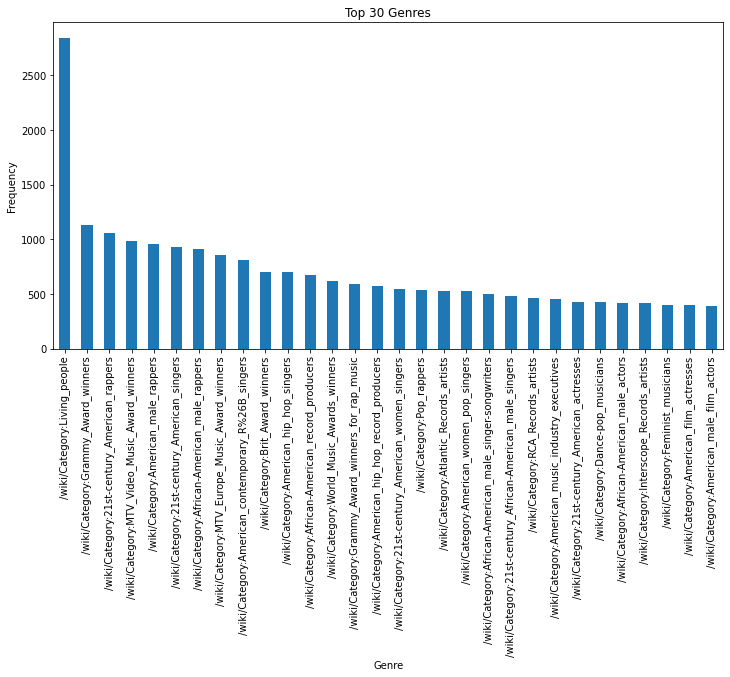

In [94]:
# Start your code here

import matplotlib.pyplot as plt

# Flatten the 'genres' column
genre_lists = finalDf['genres'].tolist()
all_genres = [genre for sublist in genre_lists for genre in sublist]

# Calculate the frequency of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Get the top 30 genres
top_genres = genre_counts.head(30)

# Plot a bar plot
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title('Top 30 Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.savefig('Top 30 Genres.png')
plt.show()


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_15312\1734697809.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  genre_means = finalDf.iloc[:, 2:].mean()


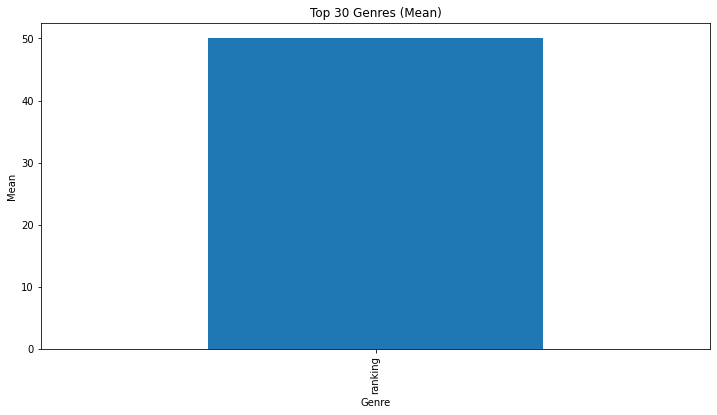

In [95]:
# Calculate the mean of the DataFrame
genre_means = finalDf.iloc[:, 2:].mean()

# Sort the genre means in ascending order
genre_means = genre_means.sort_values(ascending=True)

# Get the top 30 genre means
top_genre_means = genre_means.head(30)

# Plot a bar plot
plt.figure(figsize=(12, 6))
top_genre_means.plot(kind='bar')
plt.title('Top 30 Genres (Mean)')
plt.xlabel('Genre')
plt.ylabel('Mean')
plt.xticks(rotation=90)
plt.savefig('Top 30 Genres (Mean).png')
plt.show()


<Figure size 864x432 with 0 Axes>

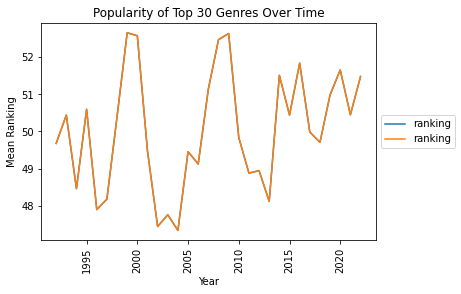

In [96]:
# Create a subframe with ranking and year for each genre
subframe = finalDf[['year', 'ranking'] + top_genre_means.index.tolist()]

# Group the data by year and calculate the mean ranking for each genre in each year
genre_popularity = subframe.groupby('year')[top_genre_means.index.tolist()].mean()

# Plot the popularity of the top 30 genres over time
plt.figure(figsize=(12, 6))
genre_popularity.plot()
plt.title('Popularity of Top 30 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Ranking')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=90)
plt.savefig('Popularity of Top 30 Genres Over Time.png')
plt.show()


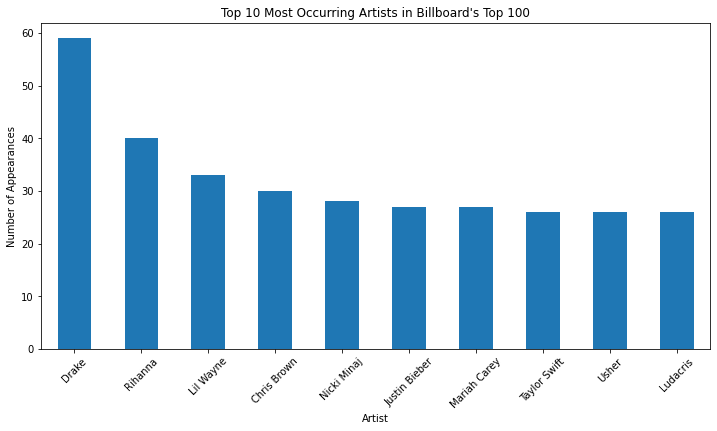

In [97]:
# Count the number of times each artist appears in the top 100
artist_counts = finalDf['band_singer'].value_counts()

# Get the top 10 most occurring artists
top_artists = artist_counts.head(10)

# Plot a bar plot of the top 10 most occurring artists
plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar')
plt.title('Top 10 Most Occurring Artists in Billboard\'s Top 100')
plt.xlabel('Artist')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.savefig('Top 10 Most Occurring Artists in Billboard\'s Top 100.png')
plt.show()


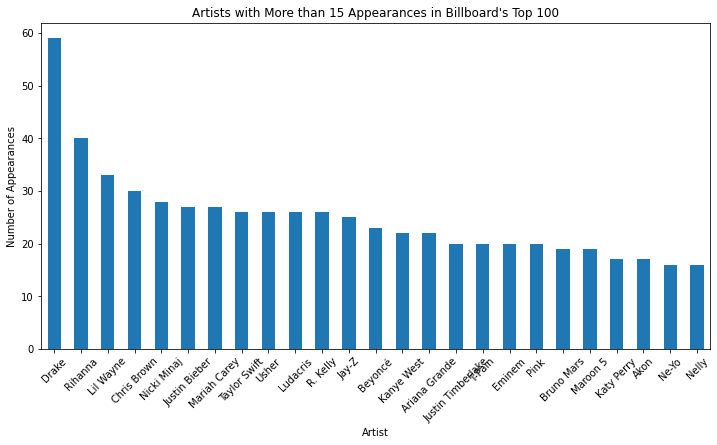

In [98]:
# Filter the artists who have occurred more than 15 times
top_artists = artist_counts[artist_counts > 15]

# Plot a bar chart of the filtered artists
plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar')
plt.title('Artists with More than 15 Appearances in Billboard\'s Top 100')
plt.xlabel('Artist')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.savefig('Artists with More than 15 Appearances in Billboard\'s Top 100.png')
plt.show()


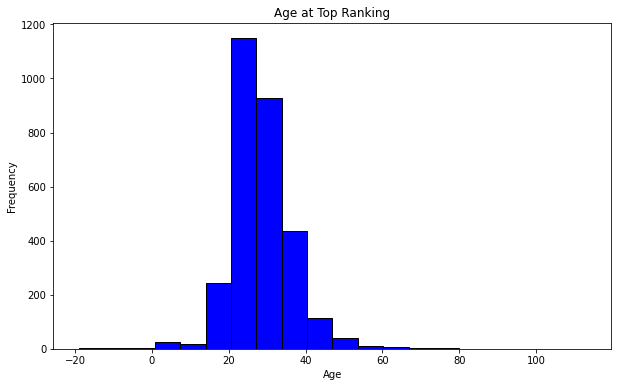

In [99]:

# Convert the 'born' column to datetime
finalDf['born'] = pd.to_datetime(finalDf['born'], errors='coerce')

# Calculate the age at top ranking using the 'born' column as the reference
age_at_top_ranking = finalDf['year'] - finalDf['born'].dt.year

# Remove any NaN values from the age column
age_at_top_ranking = age_at_top_ranking.dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(age_at_top_ranking, bins=20, color='blue', edgecolor='black')
plt.title('Age at Top Ranking')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Age at Top Ranking.png')
plt.show()


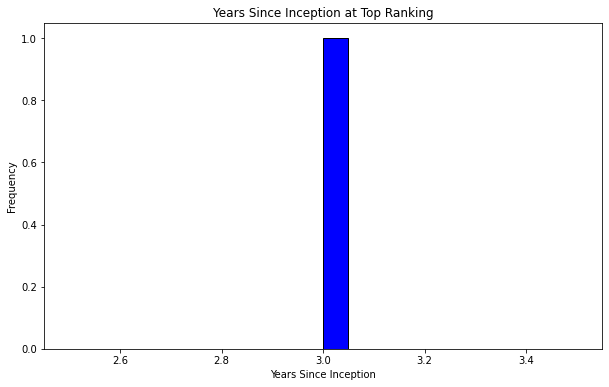

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'ya' (years active) column to datetime
finalDf['ya'] = pd.to_datetime(finalDf['ya'], errors='coerce')

# Calculate the years since inception at top ranking using the 'ya' column as the reference
years_since_inception = finalDf['year'] - finalDf['ya'].dt.year

# Remove any NaN values from the years since inception column
years_since_inception = years_since_inception.dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(years_since_inception, bins=20, color='blue', edgecolor='black')
plt.title('Years Since Inception at Top Ranking')
plt.xlabel('Years Since Inception')
plt.ylabel('Frequency')
plt.savefig('Years Since Inception at Top Ranking.png')
plt.show()
